In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # SejongGeulggot, Moneygraphy Rounded
plt.rcParams['axes.unicode_minus'] = False

## [절대값]

### 1-1 광어_가락 ~ KOSPI 

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 109일 | 0.6664 | 3.7651e-207 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.543708  1.106776e-132
1          2  0.544992  2.400083e-133
2          3  0.546114  6.418294e-134
3          4  0.547465  1.258212e-134
4          5  0.548615  3.213693e-135
..       ...       ...            ...
594      595  0.274382   7.608526e-21
595      596  0.273627   1.019870e-20
596      597  0.274153   8.893988e-21
597      598  0.273959   9.871667e-21
598      599  0.273323   1.270016e-20

[599 rows x 3 columns]


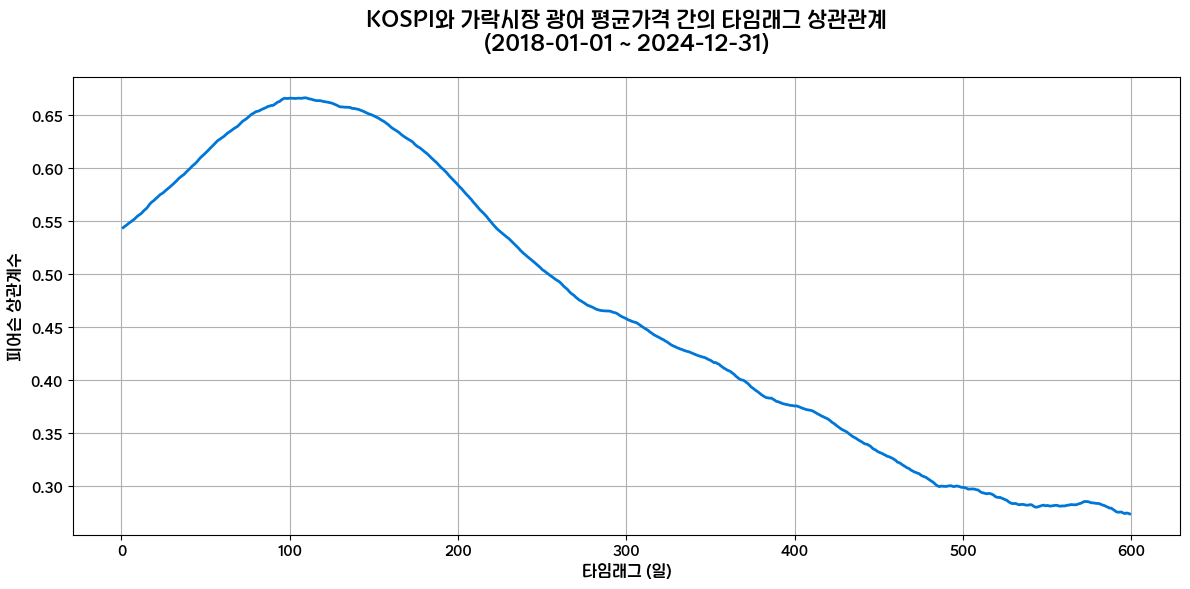

KOSPI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 109일 입니다.
최대 피어슨 상관계수: 0.6664
P-값: 3.7651e-207


In [11]:
# 경제지표 데이터 로드
df_kospi = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])


# 날짜 범위 지정 
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_kospi, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kospi_lagged = df_merged['KOSPI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kospi_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )

# 타이틀 크기 변경
plt.title(f'KOSPI와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )

plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
## plt.savefig('kospi_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'KOSPI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-2 광어_가락 ~ USD/KRW

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7022 |  2.9516e-255 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.702152  2.951608e-255
1          2  0.701564  1.673012e-254
2          3  0.700826  1.343614e-253
3          4  0.699808  2.069683e-252
4          5  0.699174  1.282207e-251
..       ...       ...            ...
594      595  0.670188  2.503745e-147
595      596  0.669655  6.982123e-147
596      597  0.670501  2.969497e-147
597      598  0.671262  1.416157e-147
598      599  0.671002  2.727940e-147

[599 rows x 3 columns]


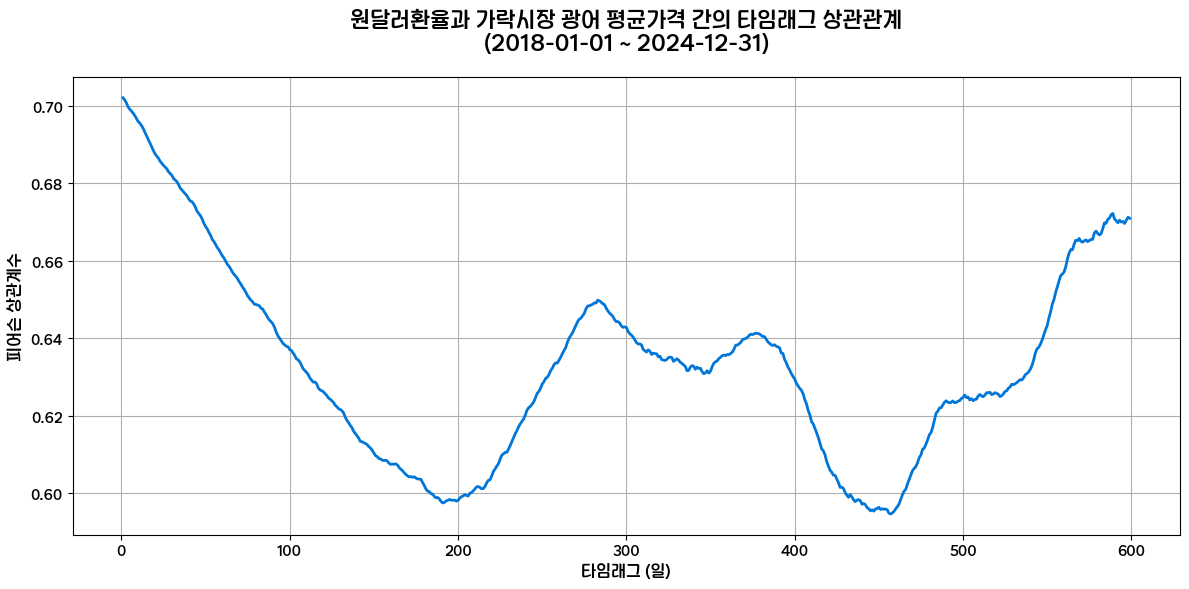

원달러 환율과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.7022
P-값: 2.9516e-255


In [12]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    usdkrw_lagged = df_merged['USD/KRW'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        usdkrw_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'원달러환율과 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('usdkrw_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'원달러 환율과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-3 광어_가락 ~ VIX

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 415일 |  0.3922  |  3.7607e-49 |


     타임래그(일)  피어슨 상관계수           P-값
0          1 -0.105586  1.164072e-05
1          2 -0.104524  1.434027e-05
2          3 -0.102614  2.065970e-05
3          4 -0.101286  2.656968e-05
4          5 -0.099491  3.707214e-05
..       ...       ...           ...
594      595  0.283787  3.028311e-22
595      596  0.283648  3.316592e-22
596      597  0.282441  5.264601e-22
597      598  0.280739  9.883461e-22
598      599  0.281961  6.761454e-22

[599 rows x 3 columns]


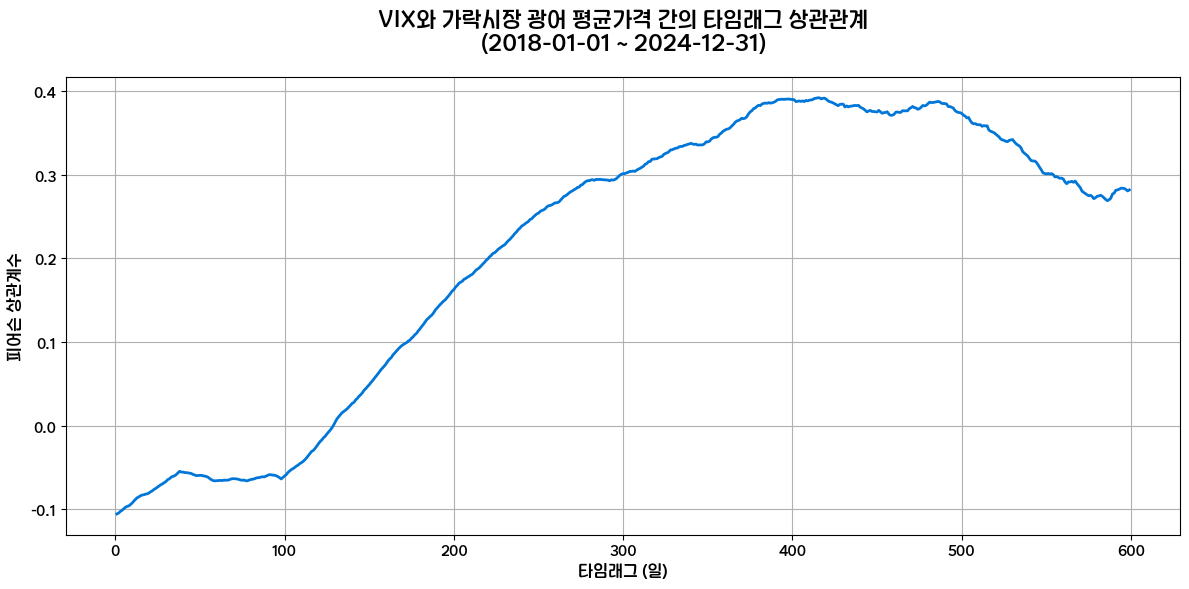

VIX와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 415일 입니다.
최대 피어슨 상관계수: 0.3922
P-값: 3.7607e-49


In [19]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    vix_lagged = df_merged['VIX'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        vix_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'VIX와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('vix_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'VIX와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-4 광어_가락 ~ WTI

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 |  0.6975  | 1.5607e-250 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.697531  1.560709e-250
1          2  0.697429  2.766173e-250
2          3  0.697090  8.482273e-250
3          4  0.696581  3.862222e-249
4          5  0.696439  7.472390e-249
..       ...       ...            ...
594      595  0.112319   1.621395e-04
595      596  0.112001   1.704040e-04
596      597  0.113051   1.488111e-04
597      598  0.113181   1.471991e-04
598      599  0.113654   1.389787e-04

[599 rows x 3 columns]


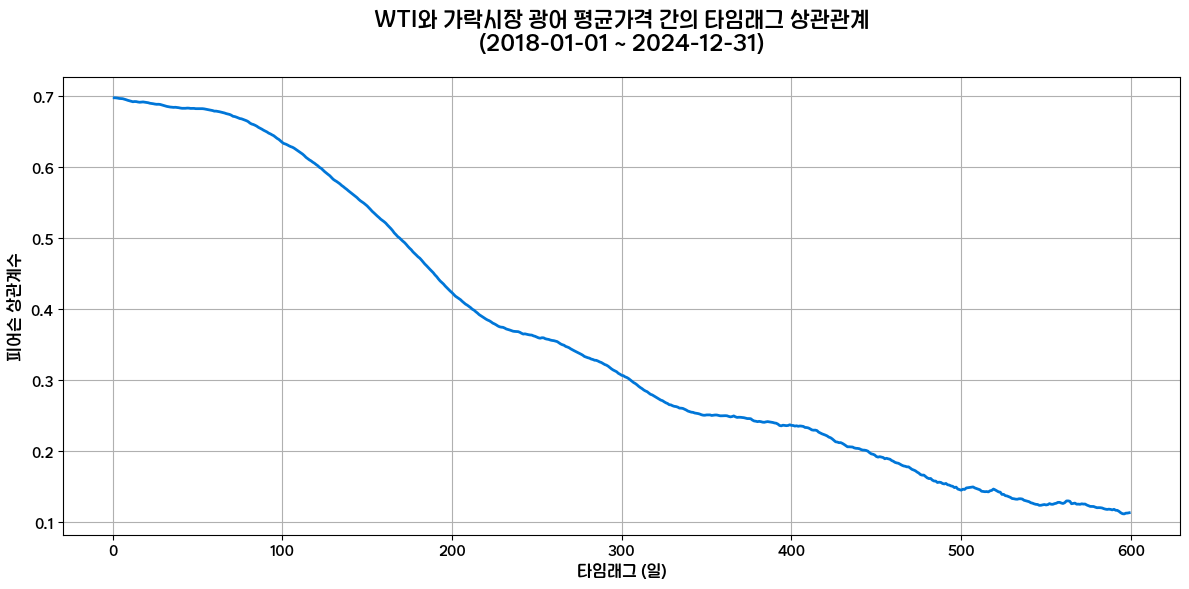

WTI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.6975
P-값: 1.5607e-250


In [14]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]
# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    wti_lagged = df_merged['WTI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        wti_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'WTI와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('wti_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'WTI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-5 광어_가락 ~ Gold

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 231일 | 0.9272  | 0.0000e+0 |

      타임래그(일)  피어슨 상관계수            P-값
0           1  0.727154  1.714138e-282
1           2  0.727895  3.498007e-283
2           3  0.728929  3.265606e-284
3           4  0.729788  4.820303e-285
4           5  0.730456  1.179569e-285
...       ...       ...            ...
1594     1595 -0.418996   1.412168e-06
1595     1596 -0.384863   1.203217e-05
1596     1597 -0.370379   2.894794e-05
1597     1598 -0.368354   3.482241e-05
1598     1599 -0.366527   4.135907e-05

[1599 rows x 3 columns]


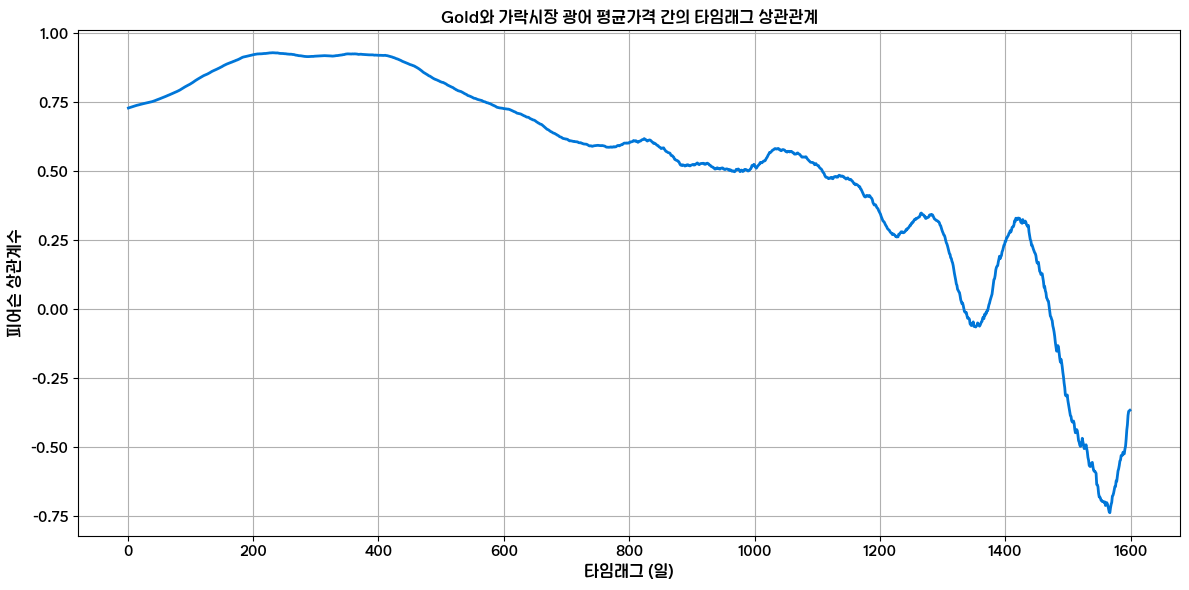

Gold와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 231일 입니다.
최대 피어슨 상관계수: 0.9272
P-값: 0.0000e+00


In [15]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    gold_lagged = df_merged['Gold'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        gold_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'Gold와 가락시장 광어 평균가격 간의 타임래그 상관관계')
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('gold_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'Gold와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-6 광어_가락 ~ Silver

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 159일 | 0.8320  | 0.0000e+0 |


      타임래그(일)  피어슨 상관계수            P-값
0           1  0.691595  1.351372e-244
1           2  0.692495  2.407530e-245
2           3  0.694078  8.910826e-247
3           4  0.695061  1.292185e-247
4           5  0.696213  1.262242e-248
...       ...       ...            ...
1594     1595 -0.289198   1.177686e-03
1595     1596 -0.297794   8.644082e-04
1596     1597 -0.312204   4.900043e-04
1597     1598 -0.331900   2.128330e-04
1598     1599 -0.366094   4.230107e-05

[1599 rows x 3 columns]


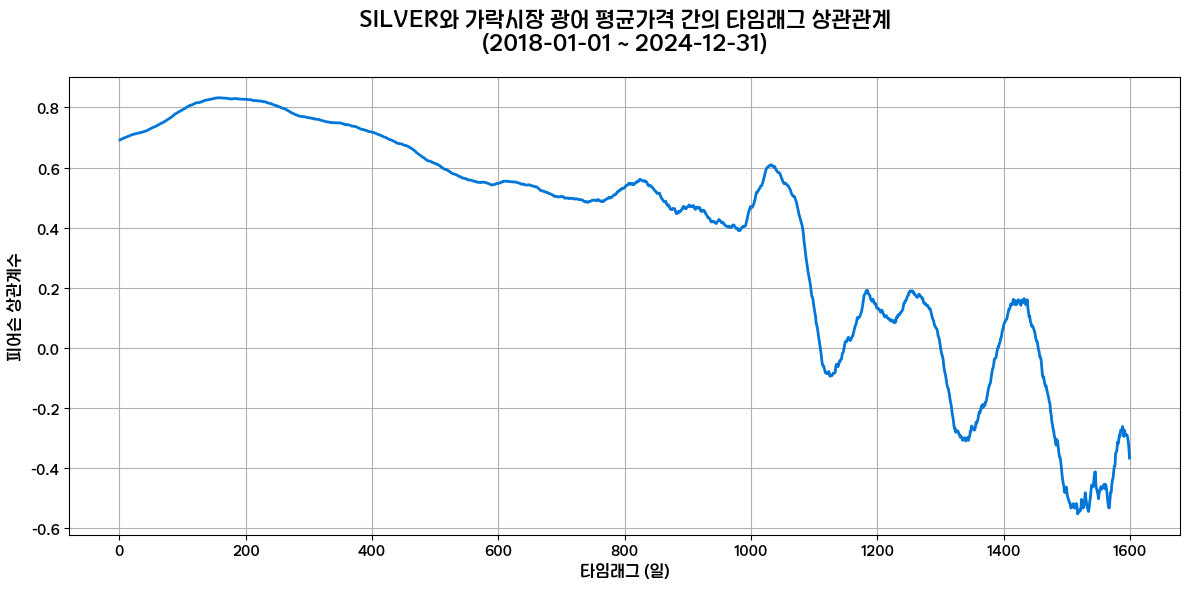

SILVER와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 159일 입니다.
최대 피어슨 상관계수: 0.8320
P-값: 0.0000e+00


In [16]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 1600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    silver_lagged = df_merged['Silver'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        silver_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'SILVER와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('silver_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'SILVER와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-7 광어_가락 ~ MOVE

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 16일 | 0.7073  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.705163  2.196658e-258
1          2  0.705370  1.885183e-258
2          3  0.706082  4.776268e-259
3          4  0.705435  3.206423e-258
4          5  0.705425  4.641169e-258
..       ...       ...            ...
594      595  0.387417   1.583580e-41
595      596  0.387289   1.835344e-41
596      597  0.386176   3.518876e-41
597      598  0.386375   3.448534e-41
598      599  0.385913   4.732364e-41

[599 rows x 3 columns]


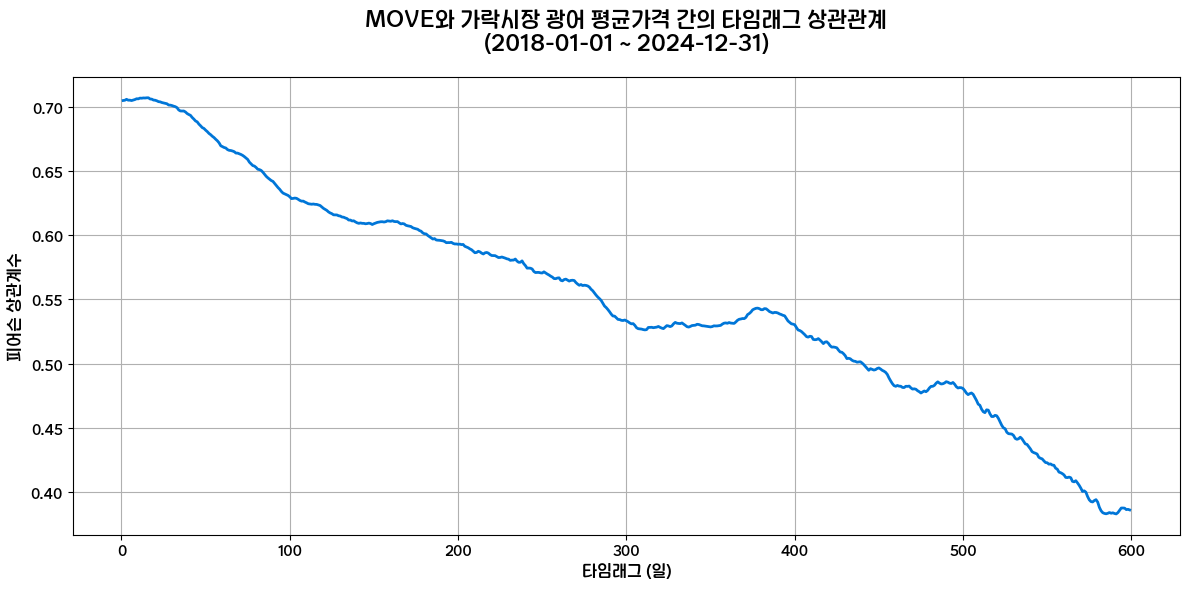

MOVE와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 16일 입니다.
최대 피어슨 상관계수: 0.7073
P-값: 2.3538e-258


In [17]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    move_lagged = df_merged['MOVE'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        move_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'MOVE와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('move_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'MOVE와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### ~~1-8 광어_가락 ~ 한국은행 기준금리~~

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7958  | 0.0000e+0 |

     타임래그(일)  피어슨 상관계수            P-값
0          1  0.623150  6.285214e-275
1          2  0.622154  1.070211e-273
2          3  0.621194  1.639076e-272
3          4  0.620206  2.667973e-271
4          5  0.619209  4.393372e-270
..       ...       ...            ...
594      595  0.023109   3.062579e-01
595      596  0.022523   3.188240e-01
596      597  0.021507   3.412793e-01
597      598  0.020428   3.661800e-01
598      599  0.019348   3.921853e-01

[599 rows x 3 columns]


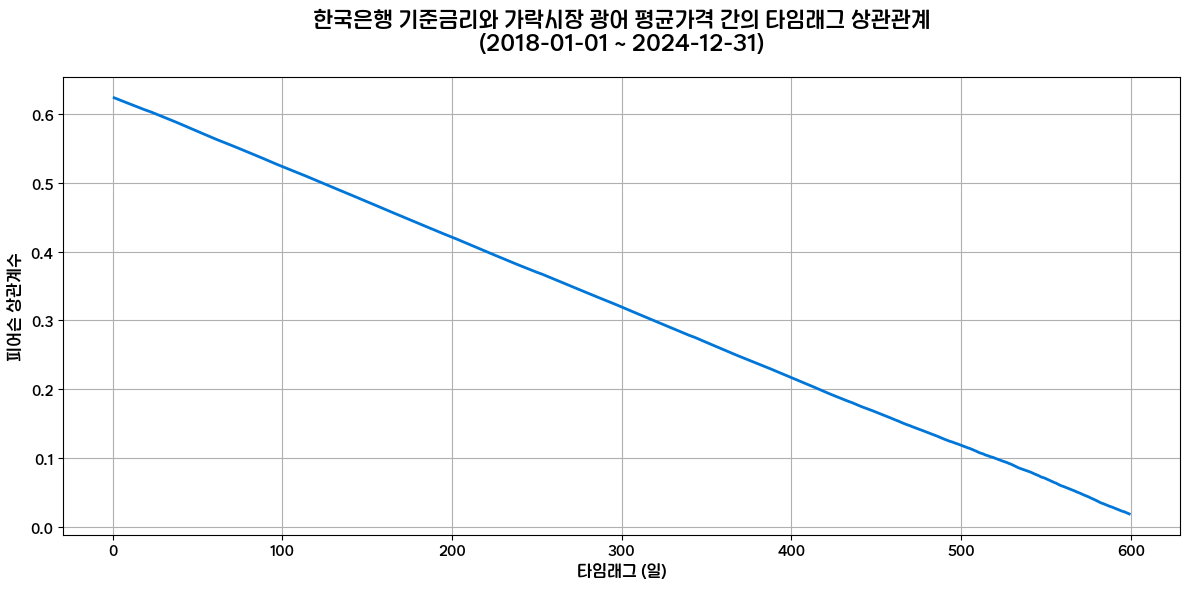

한국은행 기준금리와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.6232
P-값: 6.2852e-275


In [18]:
# 경제지표 데이터 로드
df_kr_rate = pd.read_csv('../../data/processed/d한국은행 기준금리_일자별.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_kr_rate, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kr_rate_lagged = df_merged['한국은행_기준금리'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kr_rate_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'한국은행 기준금리와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('kr_rate_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'한국은행 기준금리와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-9 광어_가락 ~ 양식 활광어(대) 가락시장 거래가격

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 57일 | 0.7704  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.750034  7.721622e-312
1          2  0.750740  1.446263e-312
2          3  0.751760  1.056869e-313
3          4  0.752301  3.191253e-314
4          5  0.753589  1.028970e-315
..       ...       ...            ...
594      595 -0.050327   9.055981e-02
595      596 -0.051399   8.402189e-02
596      597 -0.048603   1.024775e-01
597      598 -0.049938   9.351918e-02
598      599 -0.050248   9.164022e-02

[599 rows x 3 columns]


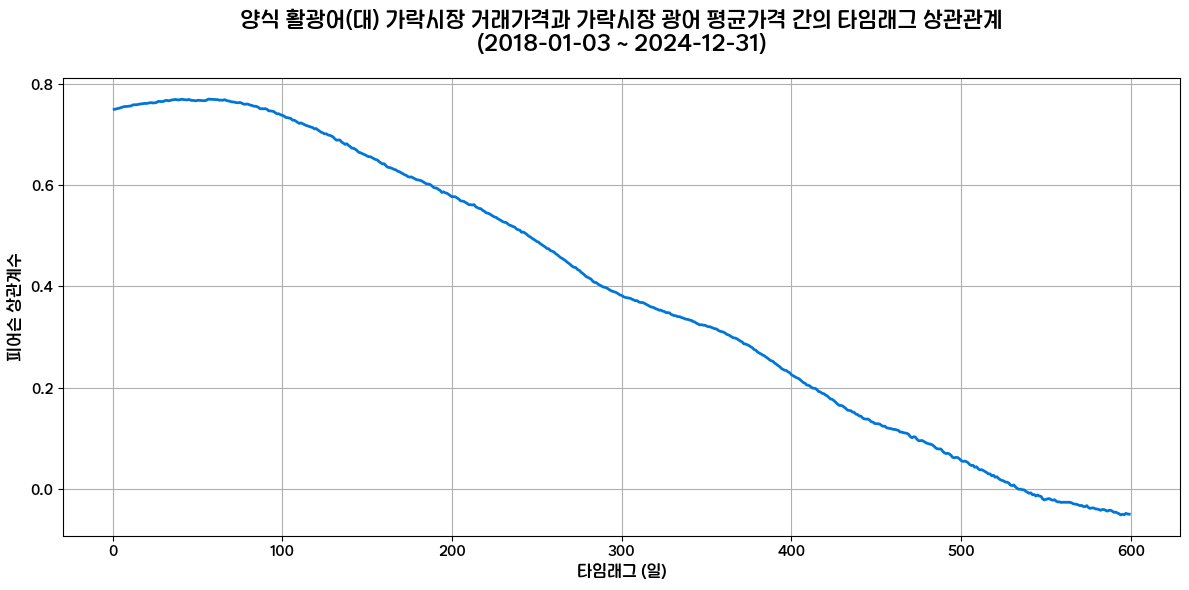

양식 활광어(대) 가락시장 거래가격과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 57일 입니다.
최대 피어슨 상관계수: 0.7704
P-값: 0.0000e+00


In [21]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d활광어(양식)가격_가락.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/item_price_lag_filled.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-03'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
    (df_price['market'] == '가락시장') &
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    ff_lagged = df_merged['광어_대'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        ff_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'양식 활광어(대) 가락시장 거래가격과 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('priceff_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'양식 활광어(대) 가락시장 거래가격과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # SejongGeulggot, Moneygraphy Rounded
plt.rcParams['axes.unicode_minus'] = False

## [절대값]

### 1-1 광어_전체평균 ~ KOSPI 

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 109일 | 0.6664 | 3.7651e-207 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.499438  5.363343e-109
1          2  0.501699  4.630966e-110
2          3  0.503856  4.439888e-111
3          4  0.506021  4.152342e-112
4          5  0.507995  4.783226e-113
..       ...       ...            ...
594      595  0.312811   6.484392e-27
595      596  0.313107   6.080732e-27
596      597  0.313551   5.383815e-27
597      598  0.313945   4.858599e-27
598      599  0.314355   4.358914e-27

[599 rows x 3 columns]


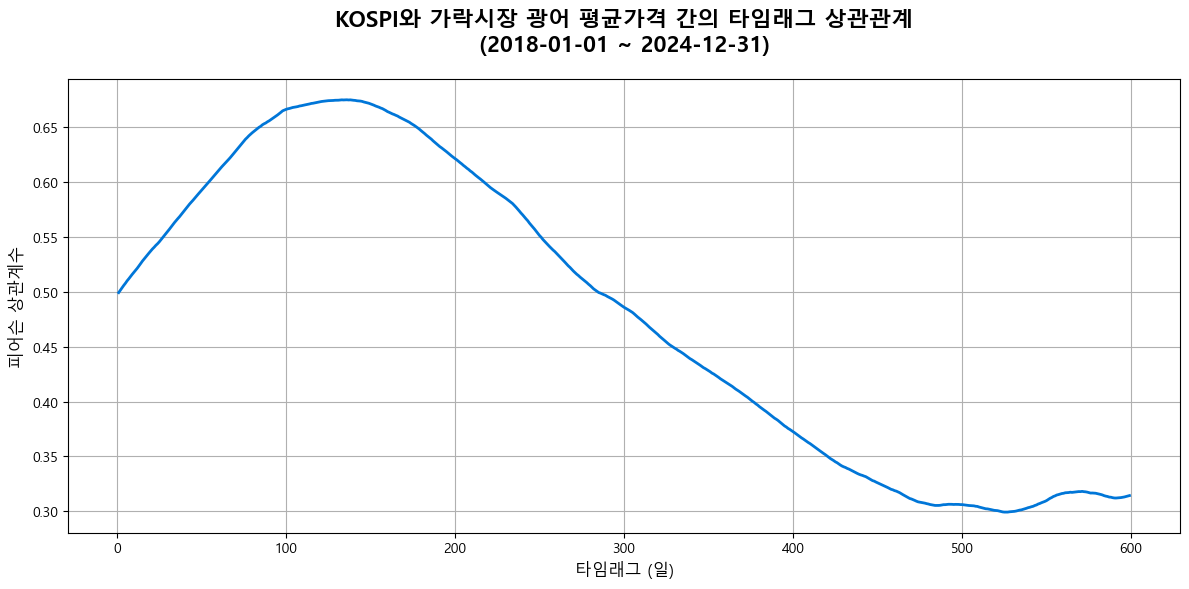

KOSPI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 136일 입니다.
최대 피어슨 상관계수: 0.6752
P-값: 4.2493e-211


In [ ]:
# 경제지표 데이터 로드
df_kospi = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])


# 날짜 범위 지정 
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 
   
	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_kospi, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    kospi_lagged = df_merged['KOSPI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        kospi_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )

# 타이틀 크기 변경
plt.title(f'KOSPI와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )

plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('kospi_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'KOSPI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-2 광어_전체평균 ~ USD/KRW

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7022 |  2.9516e-255 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.651591  4.608776e-208
1          2  0.651017  1.851110e-207
2          3  0.650494  6.706140e-207
3          4  0.650118  1.825599e-206
4          5  0.649590  6.641908e-206
..       ...       ...            ...
244      245  0.612613  1.776101e-152
245      246  0.613808  3.994195e-153
246      247  0.615075  8.042533e-154
247      248  0.616191  2.006975e-154
248      249  0.617349  4.691765e-155

[249 rows x 3 columns]


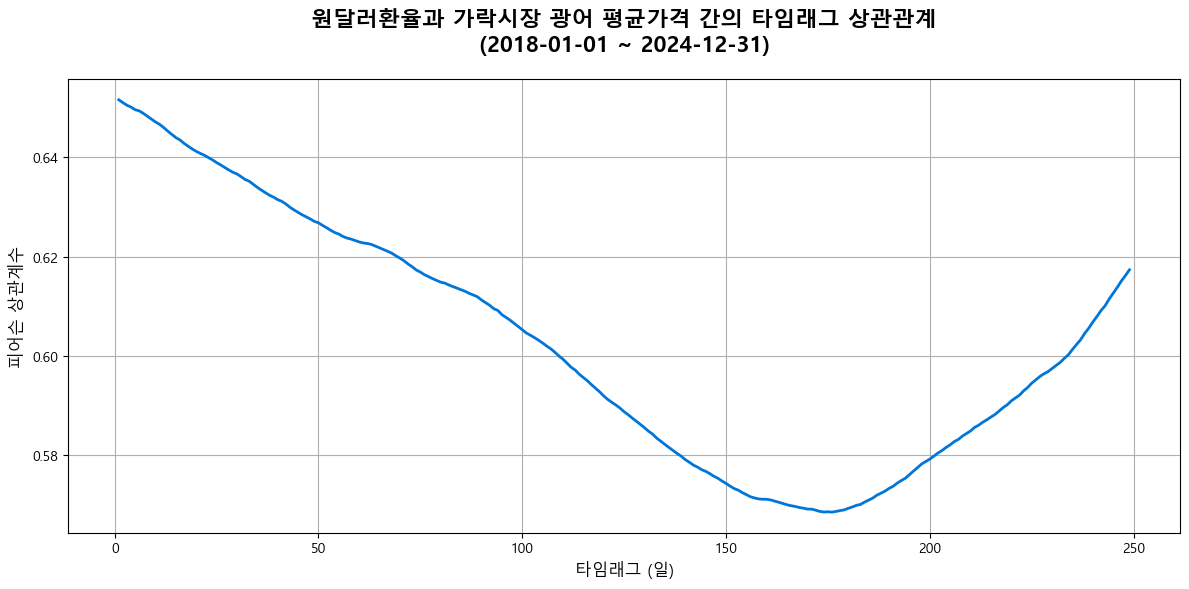

원달러 환율과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.6516
P-값: 4.6088e-208


In [ ]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 

	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 250)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    usdkrw_lagged = df_merged['USD/KRW'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        usdkrw_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'원달러환율과 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
## plt.savefig('usdkrw_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'원달러 환율과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-3 광어_전체평균 ~ VIX

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 415일 |  0.3922  |  3.7607e-49 |


     타임래그(일)  피어슨 상관계수           P-값
0          1 -0.178263  9.997591e-14
1          2 -0.177281  1.391621e-13
2          3 -0.176432  1.853248e-13
3          4 -0.174820  3.132975e-13
4          5 -0.173730  4.477069e-13
..       ...       ...           ...
594      595  0.286927  1.003931e-22
595      596  0.286458  1.237150e-22
596      597  0.286520  1.264043e-22
597      598  0.286320  1.415939e-22
598      599  0.286600  1.340058e-22

[599 rows x 3 columns]


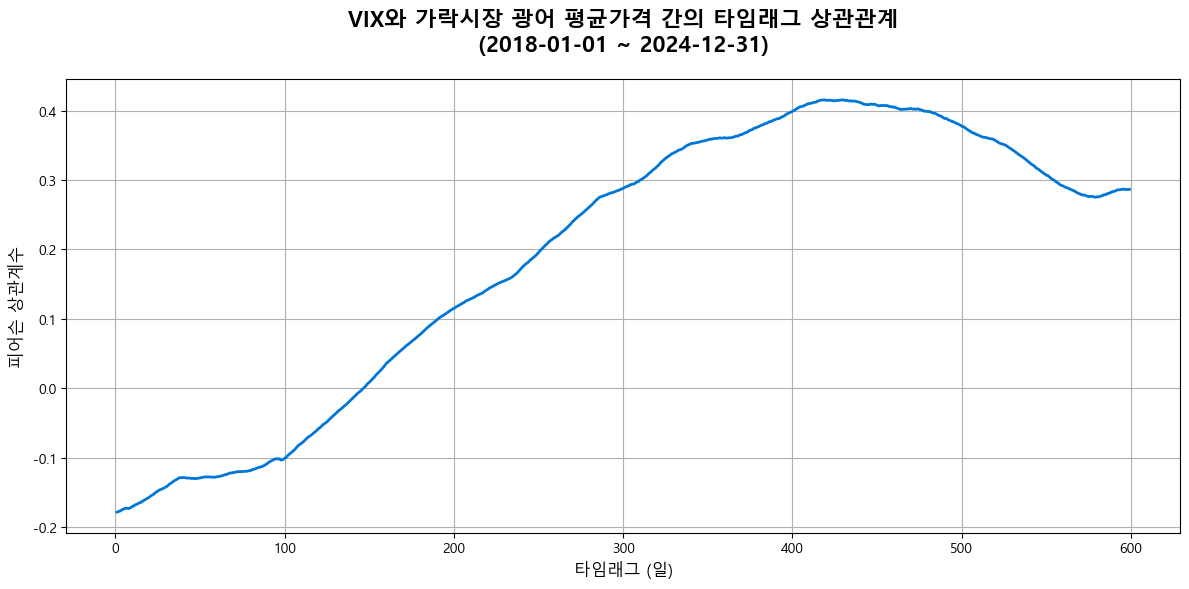

VIX와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 419일 입니다.
최대 피어슨 상관계수: 0.4156
P-값: 2.1453e-55


In [ ]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 

	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    vix_lagged = df_merged['VIX'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        vix_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'VIX와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
## plt.savefig('vix_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'VIX와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-4 광어_전체평균 ~ WTI

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 |  0.6975  | 1.5607e-250 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.727506  6.739108e-283
1          2  0.727291  1.736054e-282
2          3  0.727233  2.947024e-282
3          4  0.727035  7.256792e-282
4          5  0.726653  2.893657e-281
..       ...       ...            ...
594      595  0.166223   2.105032e-08
595      596  0.165848   2.299185e-08
596      597  0.165803   2.353293e-08
597      598  0.165323   2.622935e-08
598      599  0.164946   2.863524e-08

[599 rows x 3 columns]


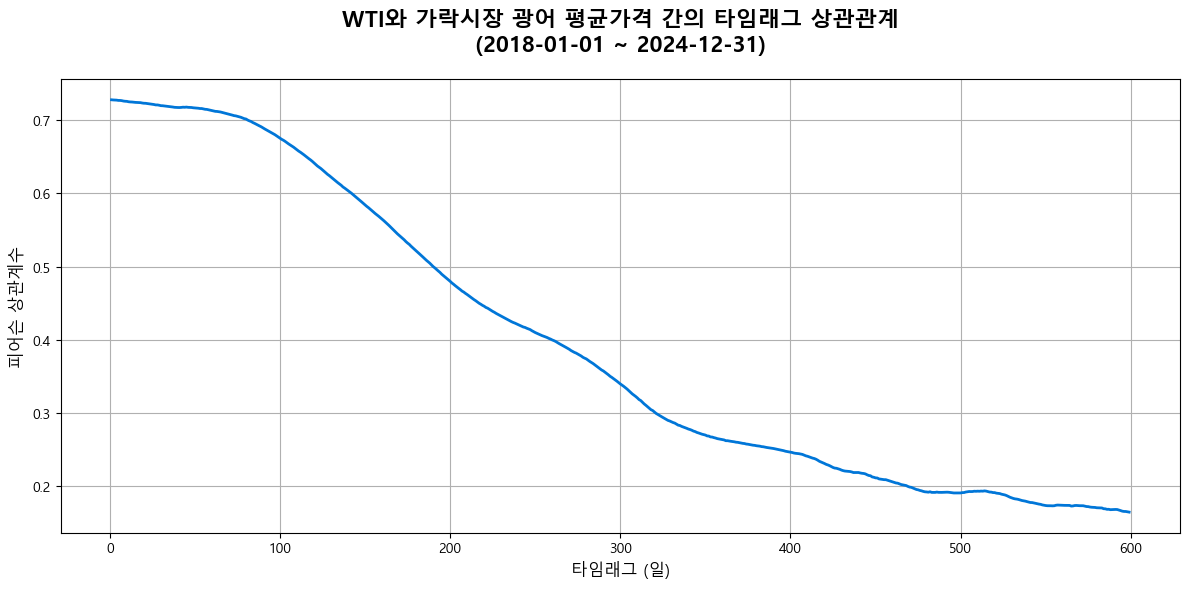

WTI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 1일 입니다.
최대 피어슨 상관계수: 0.7275
P-값: 6.7391e-283


In [9]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 

	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]
# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    wti_lagged = df_merged['WTI'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        wti_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'WTI와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
## plt.savefig('wti_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'WTI와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-5 광어_전체평균 ~ Gold

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 231일 | 0.9272  | 0.0000e+0 |

     타임래그(일)  피어슨 상관계수            P-값
0          1  0.642739  1.027195e-200
1          2  0.643666  2.341590e-201
2          3  0.644673  4.575929e-202
3          4  0.645588  1.059686e-202
4          5  0.646468  2.610940e-203
..       ...       ...            ...
594      595  0.768682  8.672951e-220
595      596  0.768215  3.620135e-219
596      597  0.767990  9.074727e-219
597      598  0.767870  1.822766e-218
598      599  0.767419  7.301119e-218

[599 rows x 3 columns]


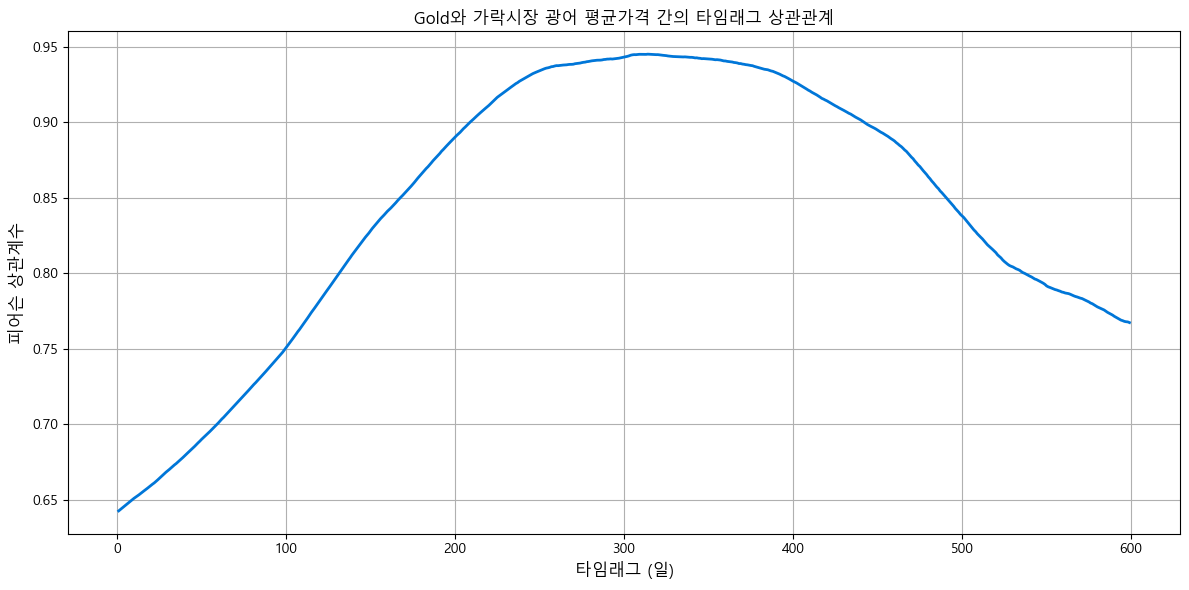

Gold와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 314일 입니다.
최대 피어슨 상관계수: 0.9452
P-값: 0.0000e+00


In [ ]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 

	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    gold_lagged = df_merged['Gold'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        gold_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'Gold와 가락시장 광어 평균가격 간의 타임래그 상관관계')
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('gold_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'Gold와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-6 광어_전체평균 ~ Silver

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 159일 | 0.8320  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.610078  1.360023e-175
1          2  0.611488  1.627753e-176
2          3  0.612960  1.736842e-177
3          4  0.614216  2.642521e-178
4          5  0.615417  4.389878e-179
..       ...       ...            ...
594      595  0.583213  2.595011e-103
595      596  0.583600  2.176814e-103
596      597  0.584367  1.251746e-103
597      598  0.585328  5.928332e-104
598      599  0.585694  5.081941e-104

[599 rows x 3 columns]


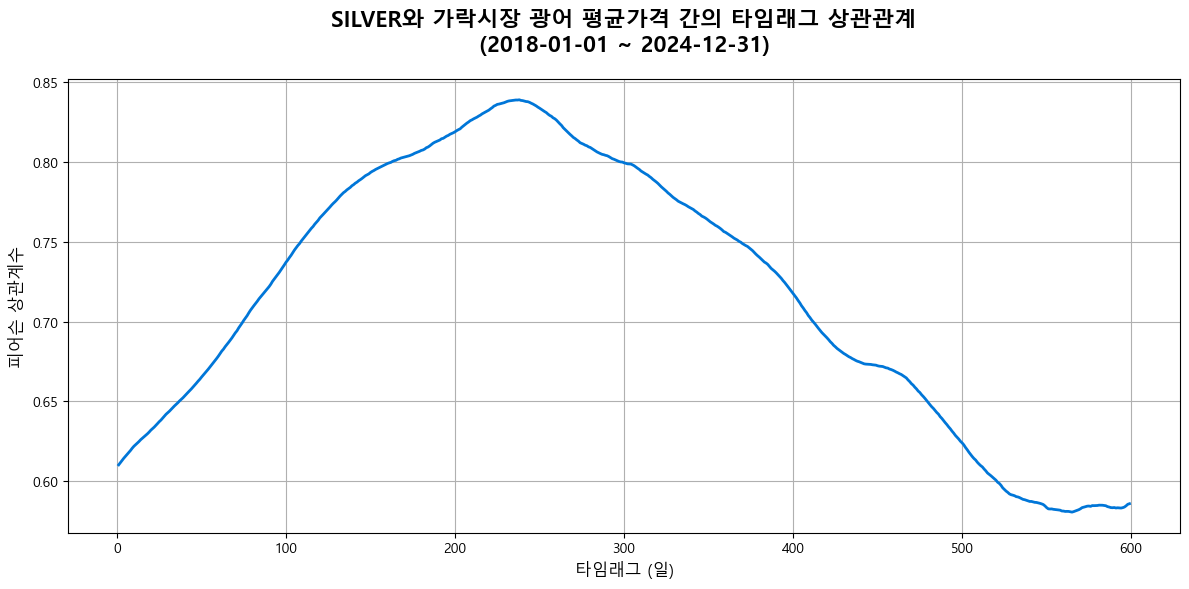

SILVER와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 238일 입니다.
최대 피어슨 상관계수: 0.8391
P-값: 0.0000e+00


In [ ]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 

	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    silver_lagged = df_merged['Silver'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        silver_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'SILVER와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('silver_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'SILVER와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### 1-7 광어_전체평균 ~ MOVE

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 16일 | 0.7073  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수            P-값
0          1  0.659654  5.647361e-215
1          2  0.659906  4.542680e-215
2          3  0.659936  5.693988e-215
3          4  0.660133  5.103883e-215
4          5  0.660159  6.454306e-215
..       ...       ...            ...
594      595  0.438975   4.229812e-54
595      596  0.438283   7.186383e-54
596      597  0.437166   1.578297e-53
597      598  0.436005   3.543770e-53
598      599  0.435336   5.898889e-53

[599 rows x 3 columns]


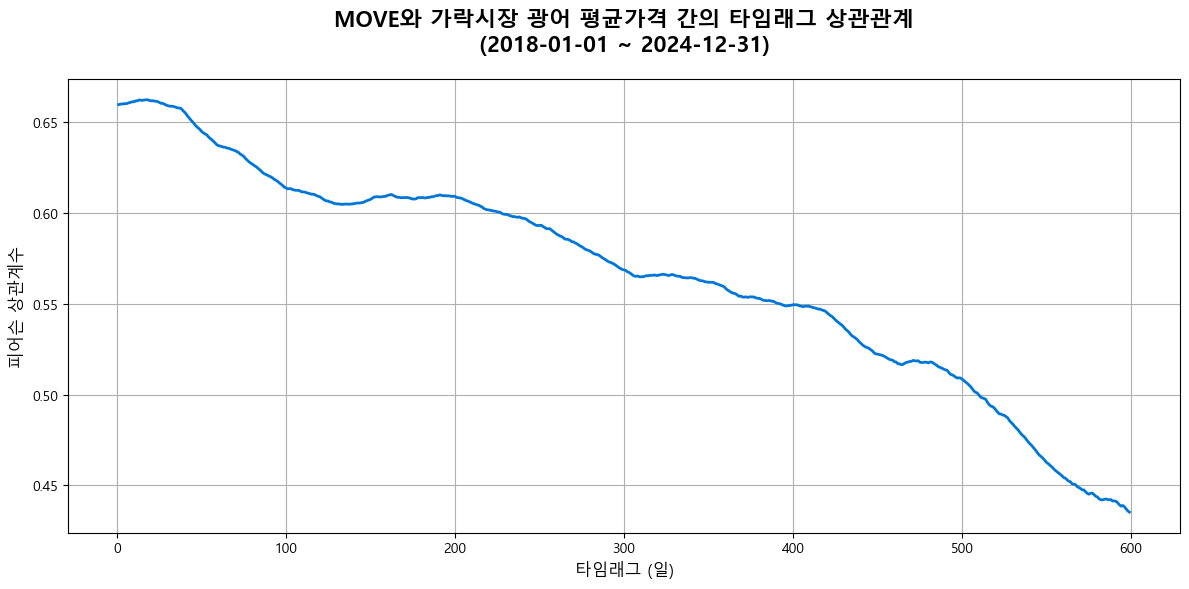

MOVE와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 18일 입니다.
최대 피어슨 상관계수: 0.6623
P-값: 3.7544e-215


In [12]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d경제지표(KOSPI, 원달러, WTI, VIX, 금, 은, MOVE).csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-01'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 

	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    move_lagged = df_merged['MOVE'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        move_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'MOVE와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('move_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'MOVE와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')

### ~~1-8 광어_전체평균 ~ 한국은행 기준금리~~

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 1일 | 0.7958  | 0.0000e+0 |

In [23]:
# # 경제지표 데이터 로드
# df_kr_rate = pd.read_csv('../../data/processed/d한국은행 기준금리_일자별.csv', parse_dates=['날짜'])

# # 아이템 가격 데이터 로드
# df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# # 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
# start_date = '2018-01-01'
# end_date = '2024-12-31'

# # 광어 데이터 필터링 (가락시장)
# df_flatfish = df_price[
#     (df_price['item'] == '광어') & 

# 	(df_price['priceDate'] >= start_date) &
#     (df_price['priceDate'] <= end_date) 
#     ]

# # 날짜 기준 병합
# df_merged = pd.merge(df_flatfish, df_kr_rate, left_on='priceDate', right_on='날짜', how='inner')

# # 타임래그 리스트
# time_lags = range(1, 600)

# # 결과 저장 리스트
# correlations = []

# for lag in time_lags:
#     # KOSPI 타임래그 컬럼 생성
#     kr_rate_lagged = df_merged['한국은행_기준금리'].shift(lag)
    
#     # 상관관계 계산 (타임래그 제외한 데이터로)
#     correlation, p_value = stats.pearsonr(
#         df_merged['avgPrice'].iloc[lag:], 
#         kr_rate_lagged.iloc[lag:]
#     )
    
#     correlations.append({
#         '타임래그(일)': lag,
#         '피어슨 상관계수': correlation,
#         'P-값': p_value
#     })

# # 결과를 데이터프레임으로 변환
# result_df = pd.DataFrame(correlations)

# # 결과 출력
# print(result_df)
# # 시각화
# plt.figure(figsize=(12, 6))
# plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
#          #marker='o',                # 마커 형태
#          linewidth=2,            # 선 굵기
#          color='#0076d8ff',          # 선 색상 (빨간색 계열)
#          markersize=3,             # 마커 크기
#          #markerfacecolor='white',  # 마커 내부 색상
#          markeredgecolor='#0076d8ff' # 마커 테두리 색상
#          )
# plt.title(f'한국은행 기준금리와 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
#          fontsize=16,        # 타이틀 크기
#          pad=20,            # 타이틀과 그래프 사이 여백
#          fontweight='bold'  # 글씨 굵기
#         )
# plt.xlabel('타임래그 (일)', fontsize=12)
# plt.ylabel('피어슨 상관계수', fontsize=12)
# plt.grid(True)
# plt.tight_layout()
# # plt.savefig('kr_rate_flatfish_correlation_plot.png')
# plt.show()

# # 상관계수가 가장 높은 타임래그 확인
# max_correlation = result_df['피어슨 상관계수'].max()
# max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
# max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

# print(f'한국은행 기준금리와 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
# print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
# print(f'P-값: {max_pvalue:.4e}')

### 1-9 광어_전체평균 ~ 양식 활광어(대) 가락시장 거래가격

| 타임래그(일) | 피어슨 상관계수 | P-value |
|----|---------|--------|
| 57일 | 0.7704  | 0.0000e+0 |


     타임래그(일)  피어슨 상관계수       P-값
0          1  0.770619  0.000000
1          2  0.772490  0.000000
2          3  0.774622  0.000000
3          4  0.775852  0.000000
4          5  0.777944  0.000000
..       ...       ...       ...
594      595 -0.009241  0.756125
595      596 -0.010701  0.719222
596      597 -0.010800  0.716856
597      598 -0.011431  0.701226
598      599 -0.011484  0.700028

[599 rows x 3 columns]


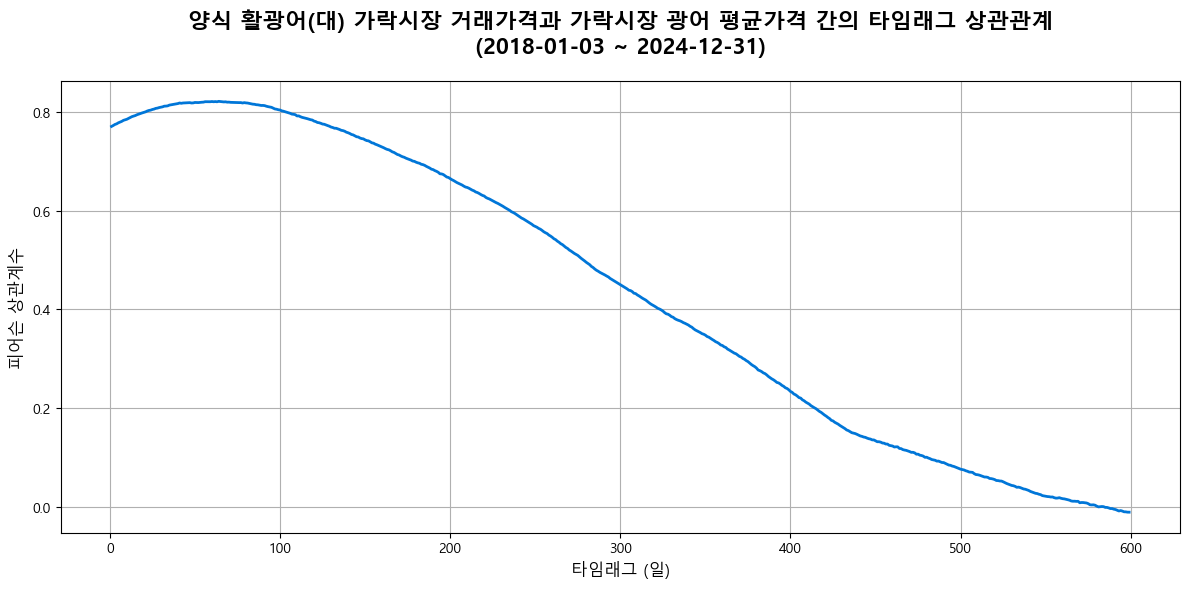

양식 활광어(대) 가락시장 거래가격과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 64일 입니다.
최대 피어슨 상관계수: 0.8214
P-값: 0.0000e+00


In [ ]:
# 경제지표 데이터 로드
df_economy = pd.read_csv('../../data/processed/d활광어(양식)가격_가락.csv', parse_dates=['날짜'])

# 아이템 가격 데이터 로드
df_price = pd.read_csv('../../data/processed/daily_item_average_prices.csv', parse_dates=['priceDate'])

# 날짜 범위 지정 (예시: 2020년 1월 1일부터 2023년 12월 31일까지)
start_date = '2018-01-03'
end_date = '2024-12-31'

# 광어 데이터 필터링 (가락시장)
df_flatfish = df_price[
    (df_price['item'] == '광어') & 

	(df_price['priceDate'] >= start_date) &
    (df_price['priceDate'] <= end_date) 
    ]

# 날짜 기준 병합
df_merged = pd.merge(df_flatfish, df_economy, left_on='priceDate', right_on='날짜', how='inner')

# 타임래그 리스트
time_lags = range(1, 600)

# 결과 저장 리스트
correlations = []

for lag in time_lags:
    # KOSPI 타임래그 컬럼 생성
    ff_lagged = df_merged['광어_대'].shift(lag)
    
    # 상관관계 계산 (타임래그 제외한 데이터로)
    correlation, p_value = stats.pearsonr(
        df_merged['avgPrice'].iloc[lag:], 
        ff_lagged.iloc[lag:]
    )
    
    correlations.append({
        '타임래그(일)': lag,
        '피어슨 상관계수': correlation,
        'P-값': p_value
    })

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(correlations)

# 결과 출력
print(result_df)
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(result_df['타임래그(일)'], result_df['피어슨 상관계수'], 
         #marker='o',                # 마커 형태
         linewidth=2,            # 선 굵기
         color='#0076d8ff',          # 선 색상 (빨간색 계열)
         markersize=3,             # 마커 크기
         #markerfacecolor='white',  # 마커 내부 색상
         markeredgecolor='#0076d8ff' # 마커 테두리 색상
         )
plt.title(f'양식 활광어(대) 가락시장 거래가격과 가락시장 광어 평균가격 간의 타임래그 상관관계\n({start_date} ~ {end_date})', 
         fontsize=16,        # 타이틀 크기
         pad=20,            # 타이틀과 그래프 사이 여백
         fontweight='bold'  # 글씨 굵기
        )
plt.xlabel('타임래그 (일)', fontsize=12)
plt.ylabel('피어슨 상관계수', fontsize=12)
plt.grid(True)
plt.tight_layout()
# plt.savefig('priceff_flatfish_correlation_plot.png')
plt.show()

# 상관계수가 가장 높은 타임래그 확인
max_correlation = result_df['피어슨 상관계수'].max()
max_lag = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, '타임래그(일)'].values[0]
max_pvalue = result_df.loc[result_df['피어슨 상관계수'] == max_correlation, 'P-값'].values[0]

print(f'양식 활광어(대) 가락시장 거래가격과 가락시장 광어 평균가격의 상관계수가 가장 높은 타임래그는 {max_lag}일 입니다.')
print(f'최대 피어슨 상관계수: {max_correlation:.4f}')
print(f'P-값: {max_pvalue:.4e}')